In [23]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.WaveformAnalysis import Waveform
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 15

In [2]:
run_parameters_file = '/g/g90/jacopod/software/TMSAnalysis/config/Run_Parameters_Xe_Run29_SimCompatible.csv'
calibrations_file = '/g/g90/jacopod/software/TMSAnalysis/config/Calibrations_Xe_Run11b.csv'
channel_map_file = '/g/g90/jacopod/software/TMSAnalysis/config/Channel_Map_Xe_Run29_MCIncluded.csv'

In [3]:
#analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
#analysis_config.GetRunParametersFromFile(run_parameters_file)
#trigger_time = analysis_config.run_parameters['Pretrigger Length [samples]']

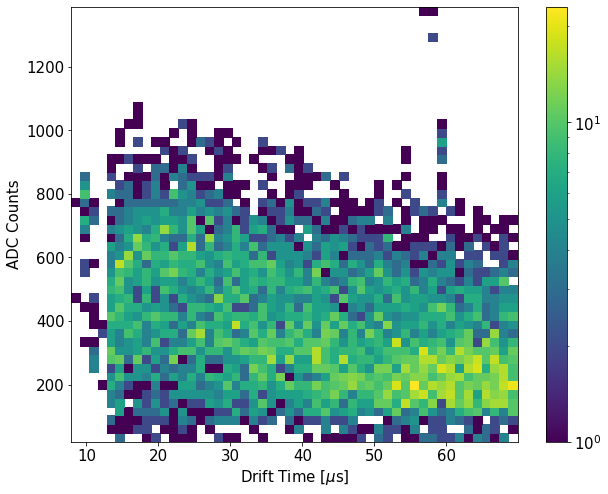

In [21]:
fname = '/p/lustre1/jacopod/alpha_sim/analysis_500ns/reduced_added.h5'
df = pd.read_hdf(fname)
DriftTime = df['TimeOfMaxChannel']# - trigger_time)*sampling_time
mask = (df['TotalTileEnergy']>20) & (df['TotalTileEnergy']<2000) & (DriftTime<700)
plt.hist2d(DriftTime[mask]/10, df['TotalTileEnergy'][mask], bins=50, norm=LogNorm())
#plt.ylim(200,2000)
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('ADC Counts')
plt.colorbar()

Finished loading.


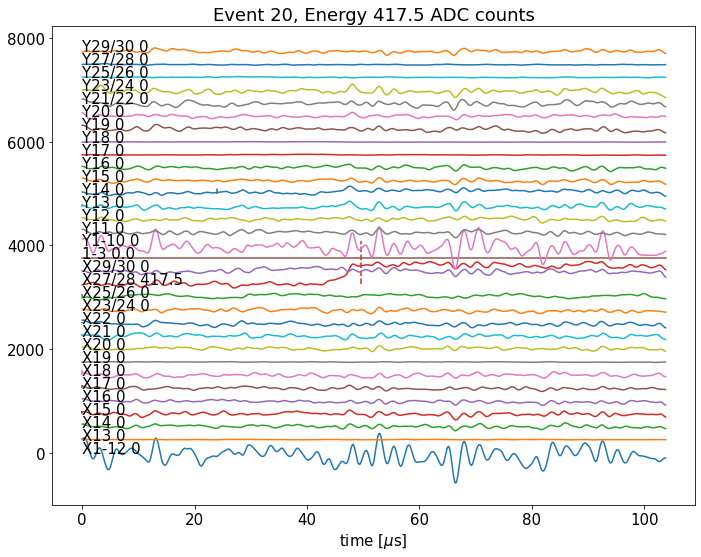

In [27]:
path = '/p/lustre1/lenardo1/stanford_teststand/simulations/alphas6207keV/rootfiles/'
event = Waveform.Simulated_Event(fname,\
                                  path,\
                                  20,\
                                  run_parameters_file,\
                                  calibrations_file,\
                                  channel_map_file)
event.smooth(0.5)
plot = event.plot_event(risetime=True)
plot.show()

electron lifetime, alpha spectrum comparison charge resolution, waveform comparison